ДЗ Сираевой Г.М. по продвинутому pandas

п. 1 Создан новый ноутбук в Colab

In [126]:
!pip install prettytable

import pandas as pd
import missingno as msno
from matplotlib import pyplot
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from astropy.table import Table, Column
import seaborn as sns

п.2 Сохраняем датасет в Google диске и загружаем в ноутбук Colab

In [178]:
from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/MyDrive/Titanic-Dataset.csv'
df = pd.read_csv(url, header='infer', sep = ',', na_values = ['na',], encoding='utf-8')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


п.1. Результат: Датасет загружен в Colab

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [162]:
cat_list = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

п.4 Определяем количество пустых ячеек

In [129]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

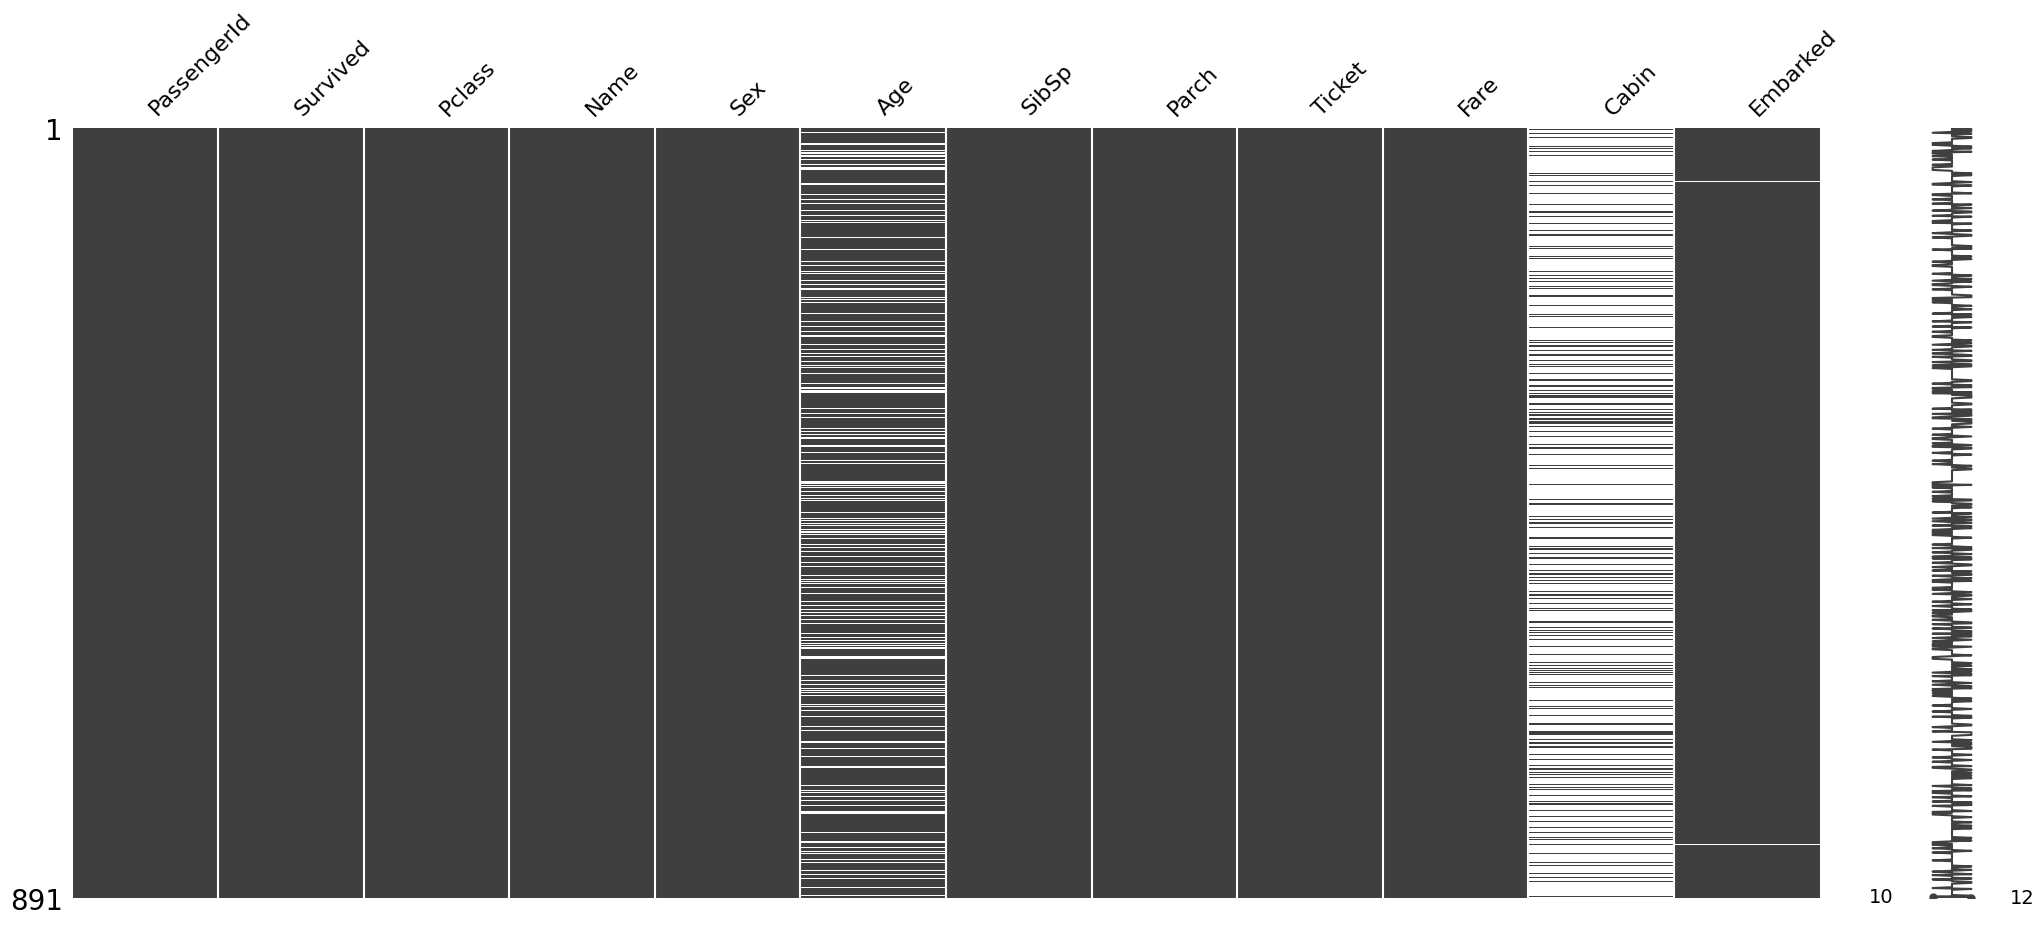

In [130]:
df.isna().sum()
msno.matrix(df);

По нашему датасету titanic, мы видим количество значений по каждому признаку.


При этом, в признаках "Age"(возраст), "Cabin"(Номер каюты) и "Embarked"(порт посадки) у нас присутствуют пропущенные значения.

In [131]:
df.isna().sum().sum()

866

In [132]:
df.isnull().T.any().T.sum()

708

В итоге, во всём датасете у нас 866 пропущенных (пустых) значений/ячеек и 708 пустых

In [133]:
#Визуализируем количество пропущенных значений:
NaN_Table = PrettyTable()
NaN_Table.field_names = ([" ", "Значения в датасете"])
NaN_Table.add_row(["Всего значений/строк в датасете", df.shape[0]])
NaN_Table.add_row([" ", " "])
NaN_Table.add_row(["Пустых значений", df.isnull().T.any().T.sum()])
NaN_Table.add_row([" ", " "])
NaN_Table.add_row(["Значений пропущено всего", df.isna().sum().sum()])
NaN_Table.add_row([" ", " "])
NaN_Table.add_row(["Из них пропущено по Age", df.Age.isna().sum()])
NaN_Table.add_row([" ", " "])
NaN_Table.add_row(["Из них пропущено по Cabin", df.Cabin.isna().sum()])
NaN_Table.add_row([" ", " "])
NaN_Table.add_row(["Из них пропущено по Embarked", df.Embarked.isna().sum()])
NaN_Table.horizontal_char = '-'
print("Анализ по пропущенным значениям")
print(NaN_Table )

Анализ по пропущенным значениям
+---------------------------------+---------------------+
|                                 | Значения в датасете |
+---------------------------------+---------------------+
| Всего значений/строк в датасете |         891         |
|                                 |                     |
|         Пустых значений         |         708         |
|                                 |                     |
|     Значений пропущено всего    |         866         |
|                                 |                     |
|     Из них пропущено по Age     |         177         |
|                                 |                     |
|    Из них пропущено по Cabin    |         687         |
|                                 |                     |
|   Из них пропущено по Embarked  |          2          |
+---------------------------------+---------------------+


п.4 Результат: мы определили количество пустых ячеек и свели значения в таблице выше

п.5 *Заполним пустые ячейки используя любую логику замещения данных

Заменим пропущенные значения средними (mean) по числовым признакам:

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [135]:
df.Age = df.Age.fillna(df.Age.mean())
df.Age.isna().sum()

0

In [136]:
# Хоть по признаку Cabin пропущенных значений 687 из 891, было бы разумнее дропнуть этот признак, но мы заменим следующим или предыдущим значением по признаку Cabin (категориальный признак)
df.Cabin.isna().sum()

687

In [137]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [138]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [139]:
df.Cabin = df.Cabin.fillna(method="bfill")
df.Cabin = df.Cabin.fillna(method="ffill")
df.Cabin.isna().sum()

0

In [140]:
# Мы заменим следующим или предыдущим значением по признаку Embarked (категориальный признак)
df.Embarked = df.Embarked.fillna(method="bfill")
df.Embarked = df.Embarked.fillna(method="ffill")
df.Embarked.isna().sum()

0

Проверим количество пропущенных значений по всему датасету

In [141]:
df.isna().sum().sum()

0

In [142]:
df.isnull().T.any().T.sum()

0

п.5 Результат: мы заполнили пустые ячейки, используя различные логики замещения данных

п.7
Посмотрим аналитику по каждому признаку:

1.   Количество уникальных значений:


In [143]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Мы видим, что наибольшее количество уникальных значений у признака Name, что неудивительно, затем у PassengerId и Ticket.

2.   Минимальное и максимальное значение (возможно посмотреть только по числовым значениям)

In [144]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


В приведенной таблице мы видим значения min и max у числовых признаков

По категориальным признакам (5 шт.) - можно посмотреть по частоте встречаемости уникальных значений

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [146]:
df.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [147]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [148]:
df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [149]:
df.Cabin.value_counts()

C78            33
D33            25
B96 B98        24
C23 C25 C27    21
E33            20
               ..
C45             1
E34             1
C62 C64         1
F G63           1
B94             1
Name: Cabin, Length: 147, dtype: int64

In [150]:
df.Embarked.value_counts()

S    645
C    169
Q     77
Name: Embarked, dtype: int64

п.7 Результат:


Мы посмотрели аналитику по каждому признаку:

1.   Определили количество уникальных значений,

2.   Определили минимальные и максимальные значения у числовых признаков и наиболее и наименее встречающиеся у категориальных признаков.

п.8 *С помощью аналитики определим влияние всех признаков на признак Survived (выживание)

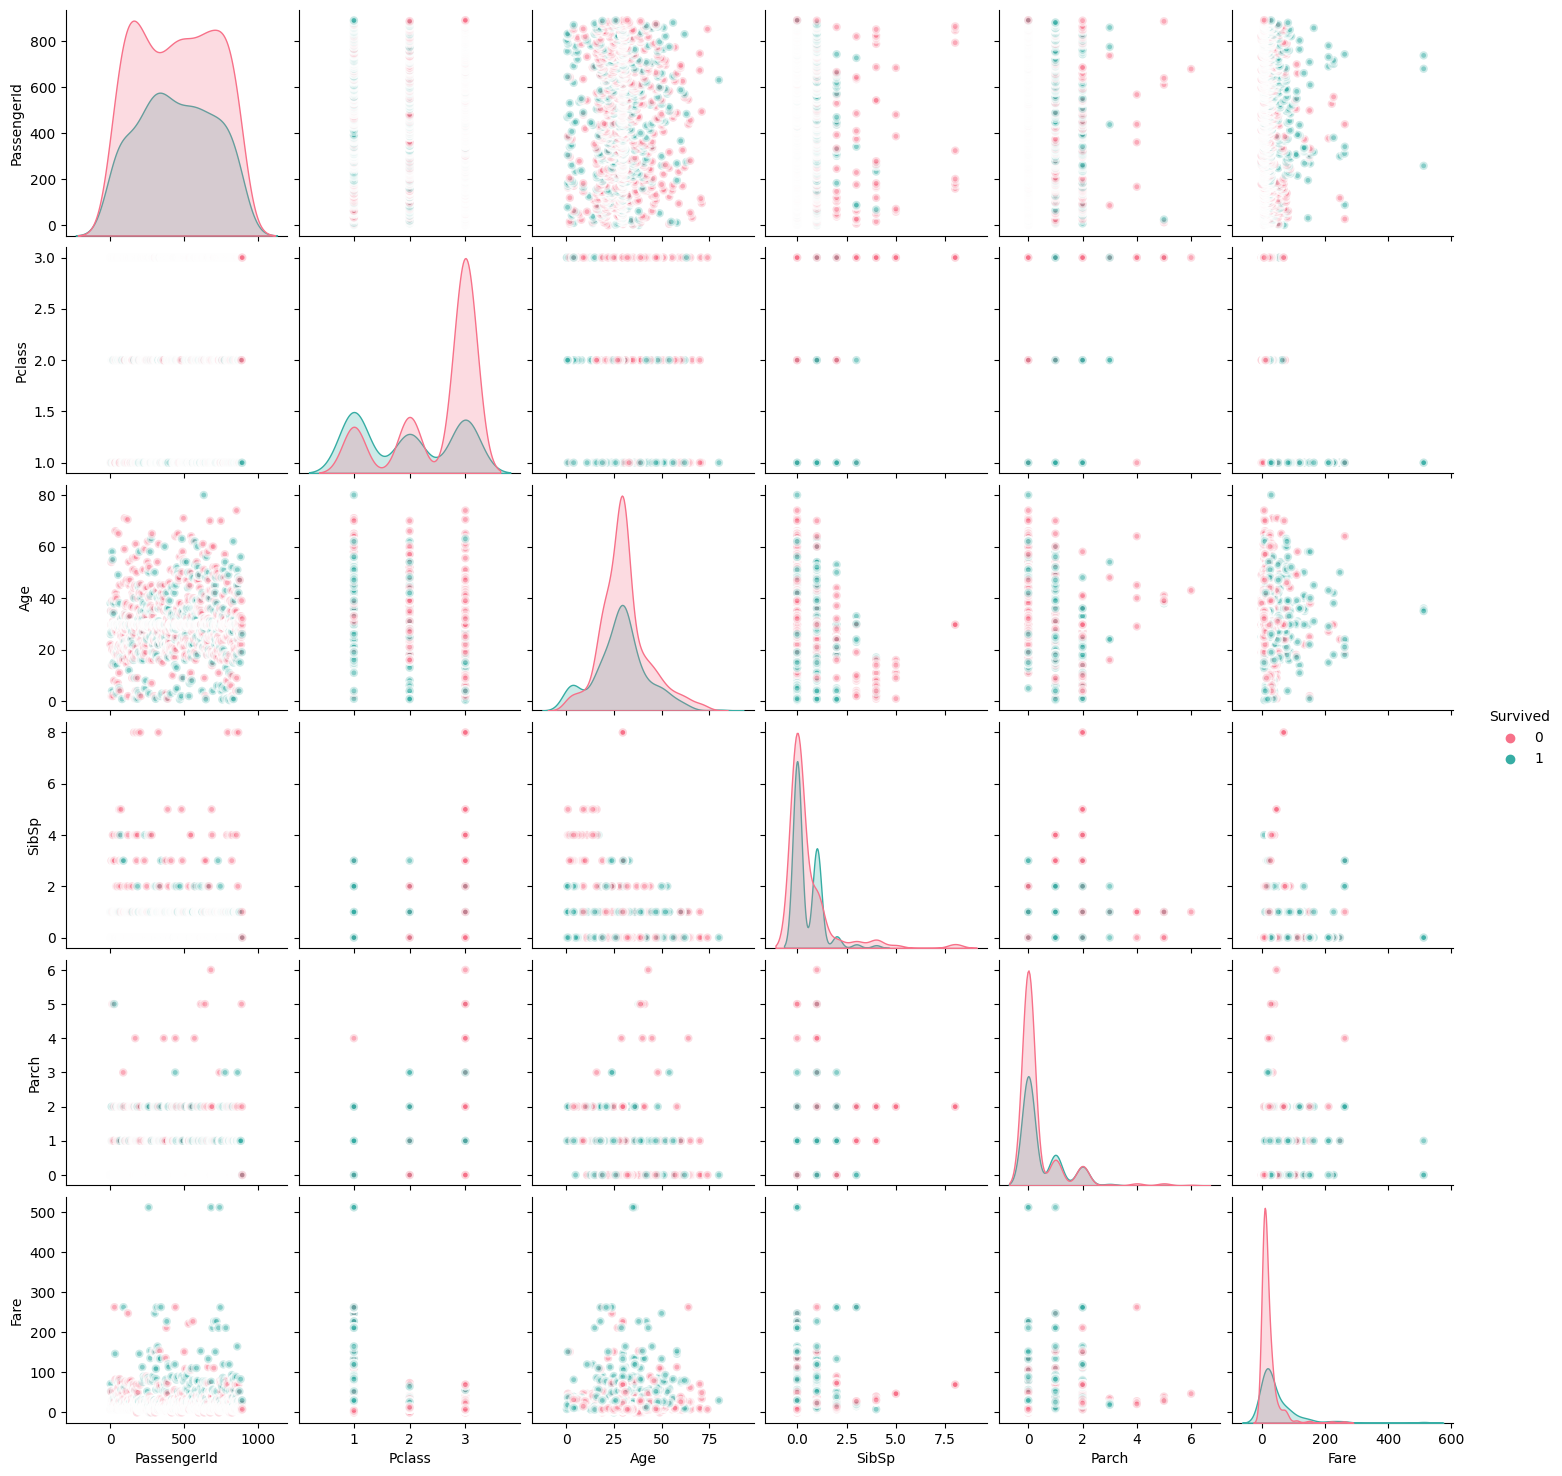

In [151]:
sns.pairplot(df, hue='Survived', palette="husl", plot_kws=dict(linewidth=2.5, alpha=0.6));

Посмотрим корреляцию через функцию corr() (через коэффициенты корреляции Пирсона в качестве метода по умолчанию):

<ipython-input-152-561603171bf6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, ax=ax);


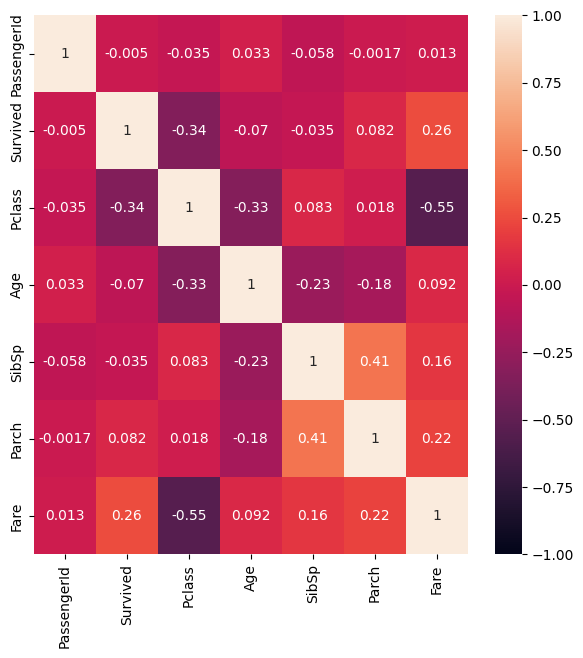

In [152]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, ax=ax);

In [183]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [187]:
df[['Fare', 'Survived']].groupby(['Survived'], as_index=False).mean()

,Survived,Fare
0,0,22.117887
1,1,48.395408


Посмотрим статистику, сколько выжило и сколько погибло пассажиров на Титанике всего:  

In [155]:
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(df)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(df)*100.0))
print ("Total: %i"%len(df))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


Посмотрим категориальные переменные:

In [163]:
cat_list

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [165]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

array([[<Axes: title={'center': 'Survived'}>]], dtype=object)

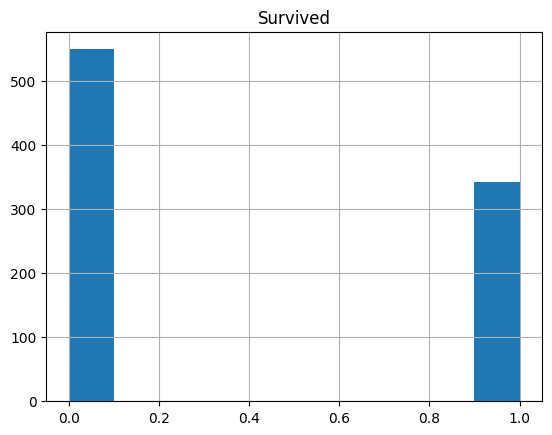

In [171]:
gg = df[['Name', 'Survived']].groupby(['Name'], as_index=False).mean()
gg.hist()

На основании уникальности значений, убираем признак Name

In [156]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


array([[<Axes: title={'center': 'Survived'}>]], dtype=object)

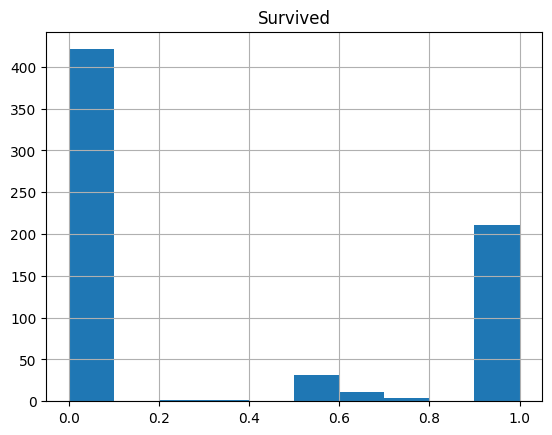

In [170]:
gg1 = df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()
gg1.hist()

array([[<Axes: title={'center': 'Survived'}>]], dtype=object)

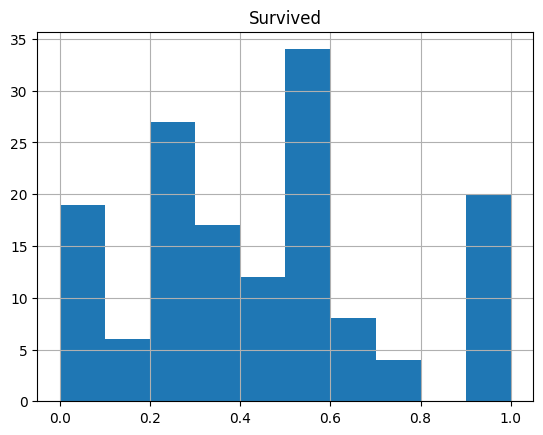

In [169]:
gg2 = df[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean()
gg2.hist()

In [168]:
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.556213
1,Q,0.389610
2,S,0.337984


In [182]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C = Cherbourg, Q = Queenstown, S = Southampton

п.8 Результат:

На основе построенных графиков:



*   по числовым принакам мы видим, что есть корреляция между признаком PClass и выживаемостью (Survived) - выживаемость выше у пассажиров 1-го класса, тогда как у 3-го класса самая низкая выживаемость, а также Fare и выживаемостью - чем стоимость проезда выше, тем выживаемость выше (так как скорее пассажиры первого класса платили больше).
*   по категориальным признакам моно выделить зависимость между признаком Sex и выживаемостью - выживаемость выше у женщин (female) ввиду очередности эвакуации и ограниченного количества мест, Embarked и выживаемостью - на данном этапе однозначно выделить причину большей выживаемости пассажиров из Cherbourg не представляется возможным (Cherbourg - первая остановка после начала маршрута Титаника,  в то время как Southampton - начало маршрута, Queenstown - последняя точка посадки пассажиров).




